In [12]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as data
import sklearn.preprocessing as skp
import sklearn.cluster as cluster
import sklearn.mixture as mix

import sklearn.neighbors as kg
from itertools import cycle, islice

import scipy as sc
np.random.seed(0)

# Groupe de travail ML. Programme

## Cycle 1: Apprentissage non supervisé

- Aujourd'hui: **Méthodes de Clustering** (approx 40 minutes) 
- Semaine du 18 octobre (jour a déterminer) : Yannick Privat  et Tom  Sprunck sur **l'apprentissage de dictionnaire en ligne/MOD + Lars**  (approx 25/30 minutes) et Victor Michel Dansac sur **Matching pursuite** (approx 25/30 minutes).
- Semaine du 1er novembre  (jour a déterminer): Clémentine Courtès: **Méthode K-SVD** (approx 25/30 min) et Laurent Navoret:  méthodes de réduction de dimension: **LLE  et/ t-SNE** (approx 25/30 min)
- Semaine du 15 novembre (jour a déterminer): Guillaume Steimer: **Reduction de dimension par Auto-encoder** (approx 25/30 min) et Léo  Bois: **auto-encoder debruiteur** (approx 25/30 min)

## Cycle 2: Apprentissage Bayesien

- Semaine du 29 Novembre (jour a déterminer) : Emmanuel Franck sur  **regression linéaire Bayesienne probabiliste** (approx 25/20 min) et Laurent Navoret sur **classification Bayesienne et  probabiliste** (approx 25/20 min)
- Semaine du 13 Décembre (jour a déterminer): Clémentine Courtès et Joubine Aghili: **Hilbert a noyau reproduisant, regression à noyau et variante Bayesienne** (approx 40/45 min) et Mélanie Piot: **réseaux Bayesien** (Approx 30 min)

## Cycle 3: Deep learning

- Semaine du 10 janvier (jour a déterminer) : Vincent Vigon **Deep learning, IA panorama général I** (approx 40 minutes)
- Semaine du 17 janvier (jour a déterminer) : Vincent Vigon **Deep learning, IA panorama général II** (approx 40 minutes)

- Semaine du 31 janvier (jour a déterminer) : Laurent Navoret **réseaux de neurones récurrent** (approx 25/30 minutes) et Vincent Vigon(?) **réseaux GRU et LSTM** 

- Sémaine du 31 janvier (jour a déterminer) : Victor Michel Dansac **WordToVec** (approx 25/30 minutes) et Vincent Vigon(?) **Attention et transformer** (approx 30/40 min)

- Semaine du 21 janvier (jour a déterminer) : Vincent Vigon(?) **Vision transformer** (approx 30/40 min),



## Cycle 4: Modèles génératif profond

- Semaine du 28 février (jour a déterminer) : Emmanuel Franck **Inférence Bayesienne et mélange Gaussien Bayesienne** (approx 40 minutes)

- Semaine du 14 mars: Emmanuel Franck **VAE et variantes** (approx 40 minutes)

- Semaine du 28 mars (jour a déterminer) : (?) **Modèle auto-régressif profond** (approx 30 min) et Romain Hild **Normalized flow** (approx 30 min)

- Semaine du 4 avril (jour a déterminer) : Victor Michel Dansac **GAN** (approx 30 minutes) et Nicolas Juillet **Gan de Wasserstein** (approx 30/40 min)

- Semaine du 25 avril (jour a déterminer) : Emmanuel Franck **Modèle génératif de diffusion** (approx 30/40 min) 

- Semaine du 9 mai (jour a déterminer) : (?) **Machine de Boltzmann restreinte (modèle d'énergie)** (approx 30/40 min) 

- Semaine du 23 mai (jour a déterminer) : Etienne Birmelé **Apprentissage auto-supervisé** (approx 45 minutes)

## Cycle 5: Géométrie de l'information

- Semaine du 13 juin (jour a déterminer) : (?) **Géométrie de l'information et métrique de fisher** (approx 30/40 min) 

- Semaine du 20 juin (jour a déterminer) : (?) **Gradient naturel** (approx 30/40 minutes)

L'année prochaine:

1) Apprentissage profond géométrique:
- Traitement du signal sur graphe
- Extension des CNN sur des graphes, nuages de points et maillages,
- Théorie géométrique des architectures de réseaux

2) Lien avec les ODE/EDP
- PINNS avancés
- Apprentissage d'opérareur DeepOnet
- PDEnet et DGNet
- Réseau Resnet lien avec les ODE et Odnet
- Lien avec les EDP

3) Applications

# Méthodes de clustering

## Rappel sur les méthodes de clustering

 Le $\color{red}{\text{clustering}}$ est une $\color{red}{\text{méthode d'apprentissage non supervisé}}$.
 
Soit un nuage d'observations $\left\{x_1,....x_n\right\}$, l'apprentissage non supervisé consiste a crée un modèle expliquant ces données. Différent de l'apprentissage supervisé ou on apprend une transformation $y=f(x)$.

Ici on cherche à regrouper les $\color{red}{\text{données en paquet/en classe}}$. Contrairement à l'apprentissage supervisé même pour les exemples on ne connait pas le classe de chaque point.

On peut voir le problème comme un $\color{red}{\text{problème de modèle génératif à variable latente}}$. C'est a dire on cherche a construire la loi de probabilité

$$
p_{\theta}(x\mid z)
$$

avec $z$ suivant une loi uniforme discrète $\mathcal{U}(1,...K)$ avec K le nombre de paquets.

### Méthodes déjà introduit

1) $\color{red}{\text{K-moyenne}}$. On construit des centres de paquets tel que la distance de chaque point a son centre de paquet soit minimale. 


2) $\color{red}{\text{Mélange Gaussien}}$. On représente $p_{\theta}(x)$ par une somme de Gaussiennes multi-D ponderée. On utilise le maximum de vraissemblance pour ajuster les paramètres des Gaussiennes et les poids tel que cela explique au mieux le nuage de point.


https://towardsdatascience.com/mixture-modelling-from-scratch-in-r-5ab7bfc83eef

## Clustering hiérarchique

Le $\color{red}{\text{clustering hierarchique}}$ est composée de deux méthodes qui vont générer une succession de composition en paquet. Ensuite on choisit la meilleure décomposition.

Deux type de $\color{red}{\text{clustering hierarchique}}$:

- **clustering descendant**: Toutes les observations sont dans le même paquet, puis on divise progressivement les paquets.
- **clustering ascendant**: Chaque observation est un paquet, puis on fusionne progressivement les paquets.

**Clustering ascendant**: on $\color{red}{\text{fusionne les paquets les plus proches}}$

Algorithme:

1) Initialisation:
- on met chaque point dans un paquet,

- on calcul une matrice $M$ de similarité entre les paquets.

2) Itération:
- on trouve les paquets les plus proches $P_i$ et $P_j$,

- on fusionne les deux paquets $P_i$ et $P_j$ en $P_k$,

- on recalcul la matrice $M$.

3) Arrêt
- On arrête lorsque on fusionne les deux derniers paquets.

**Matrice de similarité**: matrice qui mesure une distance entre les clusters. $\color{red}{\text{Quelle distance}}$ ?

Plusieurs options

- "single linkage"
- "average linkage"
- "complete linkage"
- "ward linkage"

**Single Linkage**:

La distance entre deux paquets est donnée par la distance entre les deux points les plus proches de paquets différent:

$$
d_{min}(P_i,P_j)=\operatorname{min}(d(x_{k_i},x_{k_j}), x_{k_i} \in P_i, x_{k_j} \in P_j)
$$

- Classes assez "générales".
- Peu robuste au anomalies dans les données et aux données bruitées.

**Complete Linkage**:

La distance entre deux paquets est donnée par la distance entre les deux points les plus éloignées de paquets différent:

$$
d_{max}(P_i,P_j)=\operatorname{max}(d(x_{k_i},x_{k_j}), x_{k_i} \in P_i, x_{k_j} \in P_j)
$$

- Classes plus "spécifiques". 
- Peu robuste au anomalies dans les données et aux données bruitées.

**Average Linkage**:

La distance entre deux paquets est donnée par la distance moyenne entre les points de chaque paquet:

$$
d_{ave}(P_i,P_j)=\frac{1}{\mid P_i\mid \mid P_j \mid}\sum_{x_{k_i}\in P_i}\sum_{x_{k_j}\in P_j}d(m_{k_i},m_{k_j})
$$

- Robuste au anomalies dans les données et aux données bruitées.

**Ward linkage**:
On choisit la fusion qui minimise la variance du nouveau paquet crée:

donc cela revient à minimiser pour les nouveaux paquets possibles la quantité

$$
I_i=\frac{1}{\mid P_i\mid} \sum_{x_{k_i} \in P_i}d(x_{k_i},m_i), \quad \mbox{avec } m_i=\frac{1}{\mid P_i\mid} \sum_{x_{k_i} \in P_i}x_{k_i}
$$

On peut utiliser tout type de distance: l1, l2, Manhattan etc

On obtient une série de possiblité de cluster: **Comment on choisit ?**

- on se fixe à l'avance le nombre de cluster,
- on s'arrête quand la distance entre les classes semble suffisemment importante.

In [50]:
def plot(n_samples):
    noisy_moons = data.make_moons(n_samples=n_samples, noise=.05)
    blobs = data.make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    # blobs with varied variances
    varied = data.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=8)

    # Set up cluster parameters
    plt.figure(figsize=(9 * 1.1 + 2, 12.0))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

    plot_num = 1
    default_base = {'n_neighbors': 10, 'n_clusters': 3}
    datasets = [
        (noisy_moons, {'n_clusters': 2}),
        (varied, {'n_neighbors': 2}),
        (blobs, {}),
        (no_structure, {})]

    for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X, y = dataset
        # normalize dataset for easier parameter selection
        X = skp.StandardScaler().fit_transform(X)
        ward = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='ward')
        complete = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='complete')
        average = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='average')
        single = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='single')

        clustering_algorithms = (
            ('Single Linkage', single),
            ('Average Linkage', average),
            ('Complete Linkage', complete),
            ('Ward Linkage', ward),
        )

        for name, algorithm in clustering_algorithms:       
            algorithm.fit(X)
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            plt.xlim(-2.3, 2.3)
            plt.ylim(-2.3, 2.3)
            plt.xticks(())
            plt.yticks(())
            plot_num += 1
    plt.show()

Comparaison des approches:

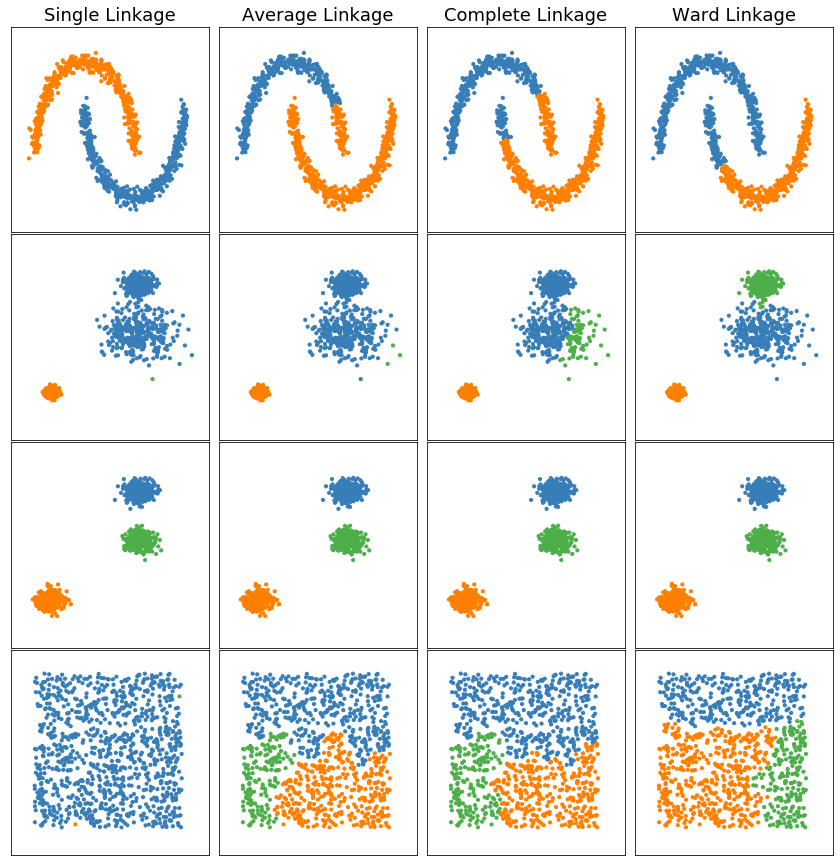

In [40]:
plot(1000)

In [61]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

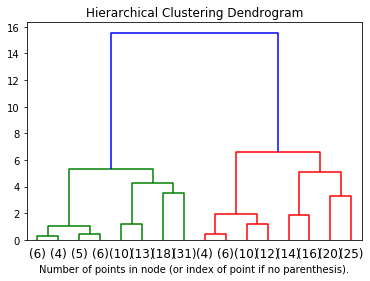

In [66]:
X,y = data.make_moons(n_samples=200, noise=.05)
model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

On détaillera pas le clustering hiérarchique descendant. Il semble moins couramment utilisé.

## Clustering par estimation de densité

Soit $[x_1,....x_n]$ avec $x_i\in\mathbb{R}^d$ un échantillon i.d.d d'une variable aléatoire $x$ de densité de probabilité $f$.

L'estimateur non-paramétrique par la méthode du noyau de la densité est donné par:

$$
f_n(x)= \frac{1}{h^d n}\sum_{i=1}^n K\left(\frac{x-x_i}{h}\right)
$$

avec $K(x)$ un noyau radial $K(x)=c_k k(\parallel x \parallel^2)$ et $k(x)$ un noyau comme le noyau Gaussien.




### Clustering par décalage moyen

Idée de la méthode par décalage moyen:
- on cherche à placer des centres de paquets,
- on veut placer les centres aux zones de plus forte densité.

Cela revient à placer les centres des paquets au $\color{red}{\text{maximum locaux de la densité de probabilité estimée}}$.


Recherche de maximum locaux = méthode de gradient.

$$
\nabla f_n(x)=\frac{2c_k}{nh^{d+2}}\left[\sum_{i=1}^n g\left(\parallel\frac{x-x_i}{h}\parallel^2\right)\right]\left[\frac{\sum_{i=1}^n x_i g\left(\parallel\frac{x-x_i}{h}\parallel^2\right)}{\sum_{i=1}^n g\left(\parallel\frac{x-x_i}{h}\parallel^2\right)}-x\right]
$$

avec $g(x)=-k^{'}(x)$. On appelle le second terme **décalage moyen**:

$$
m(x)=\frac{\sum_{i=1}^n x_i g\left(\parallel\frac{x-x_i}{h}\parallel^2\right)}{\sum_{i=1}^n g\left(\parallel\frac{x-x_i}{h}\parallel^2\right)}-x
$$

Pour trouver le maximum de la densité on peut **décaler les centres dans la direction du décalage moyen**.

**Algorithme**:

1) on initialise les centres de paquets aléatoirement $[c_1^{(0)},...c_K^{(0)}]$,

2) Pour tout centre de paquet i:
- on calcul $m(c_i^{(t)})$,
- on calcul $c_i^{(t+1)}=c_i^{(t)}+m(c_i^{(t)})$,
- on arrête quand $\nabla f_n(c_i^{(t+1)})=0$,

3) on classe les points avec leurs centres les plus proches.

### Clustering DBSCAN

La méthode DBSCAN est basée sur une vision des paquets comme des:

$\color{red}{\text{des zones ou la densité de probabilité est grande, séparées par des zones de faibles densité}}$.

Il ne suppose pas que les clusters sont convexes.


**Notions clés**: 

- **point central**: il s'agit de point qui se place dans une zone de haute densité. Donc son voisinage est dense.
- **point frontière**: il ne s'agit pas d'un point central mais est dans le voisinage d'un point central.
- **point abérrant**: il ne s'agit pas d'un point central et il n'est pas dans le voisinage d'un point central.

Un cluster est donc un ensemble de **points centrals**.


On se donne un espace métrique $(E,d)$ avec $d$ une distance.

- On définit un **epsilon-voisinage** comme
$$
V_{\epsilon}(p)=\left\{x  \in X, d(x,p) \leq \epsilon\right\}
$$
il s'agit de l'ensemble des points qui sont dans une boule ouverte de rayon $\epsilon$ et de centre $p$

- Un **epsilon-voisinage** est **dense** si le cardinal de l'espilon voisiniage est suffisamment grand:

$$
\mid V_{\epsilon}(p)\mid > min_{points}
$$

On se retrouve avec trois paramètres: $d$, $\epsilon$ and $min_{points}$.

**Algorithme:**

1) Pour chaque point $p$ non visité dans le jeu de données $D$
- on le note visité,
- on calcul son **epsilon voisinage**,
- on test si le voisinage est dense. Si non on note le point comme aberrant. Sinon: incrément $nb_{cluster}$ et on appel 

2) Extension du cluster

$extend(p, D, \mid V_{\epsilon}(p)\mid, nb_{cluster})$:

1) on ajoute $p$ au paquet numéro $nb_{cluster}$,

2) pour tout $q \in V_{\epsilon}(p)$  :
- si $q$ pas visité, on le marque visité, on calcul son voisinage $V_{\epsilon}(q)$. SI ce voisinage est dense on écrit:

$$
V_{\epsilon}(p) =V_{\epsilon}(p) \cup V_{\epsilon}(q)
$$

- $q$ n'appartient pas a un cluster on l'ajoute dans le paquet $nb_{cluster}$.

## Comparaison

In [14]:
def plot_comp():
    np.random.seed(0)

    n_samples = 1500
    noisy_circles = data.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
    blobs = data.make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    # Anisotropicly distributed data
    random_state = 150
    X, y = data.make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.7], [-0.5, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    varied = data.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
    plt.figure(figsize=(9 * 2 + 3, 13))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

    plot_num = 1
    default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
    datasets = [
        (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                    'min_samples': 20, 'xi': 0.25}),
        (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
        (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
        (blobs, {}),
        (no_structure, {})]

    for i_dataset, (dataset, algo_params) in enumerate(datasets):
        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X, y = dataset
        X = skp.StandardScaler().fit_transform(X)

        bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

        # connectivity matrix for structured Ward
        connectivity = kg.kneighbors_graph(
            X, n_neighbors=params['n_neighbors'], include_self=False)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # ============
        # Create cluster objects
        # ============
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
        dbscan = cluster.DBSCAN(eps=params['eps'])
        average_linkage = cluster.AgglomerativeClustering(
            linkage="average", affinity="cityblock",
            n_clusters=params['n_clusters'], connectivity=connectivity)
        gmm = mixture.GaussianMixture(
            n_components=params['n_clusters'], covariance_type='full')

        clustering_algorithms = (
            ('MiniBatch\nKMeans', two_means),
            ('MeanShift', ms),
            ('Agglomerative\nClustering', average_linkage),
            ('DBSCAN', dbscan),
            ('Gaussian\nMixture', gmm)
        )

        for name, algorithm in clustering_algorithms:
            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings(
                    "ignore",
                    message="the number of connected components of the " +
                    "connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.",
                    category=UserWarning)
                warnings.filterwarnings(
                    "ignore",
                    message="Graph is not fully connected, spectral embedding" +
                    " may not work as expected.",
                    category=UserWarning)
                algorithm.fit(X)

            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
            # add black color for outliers (if any)
            colors = np.append(colors, ["#000000"])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            plt.xlim(-2.5, 2.5)
            plt.ylim(-2.5, 2.5)
            plt.xticks(())
            plt.yticks(())
            plot_num += 1
    plt.show()

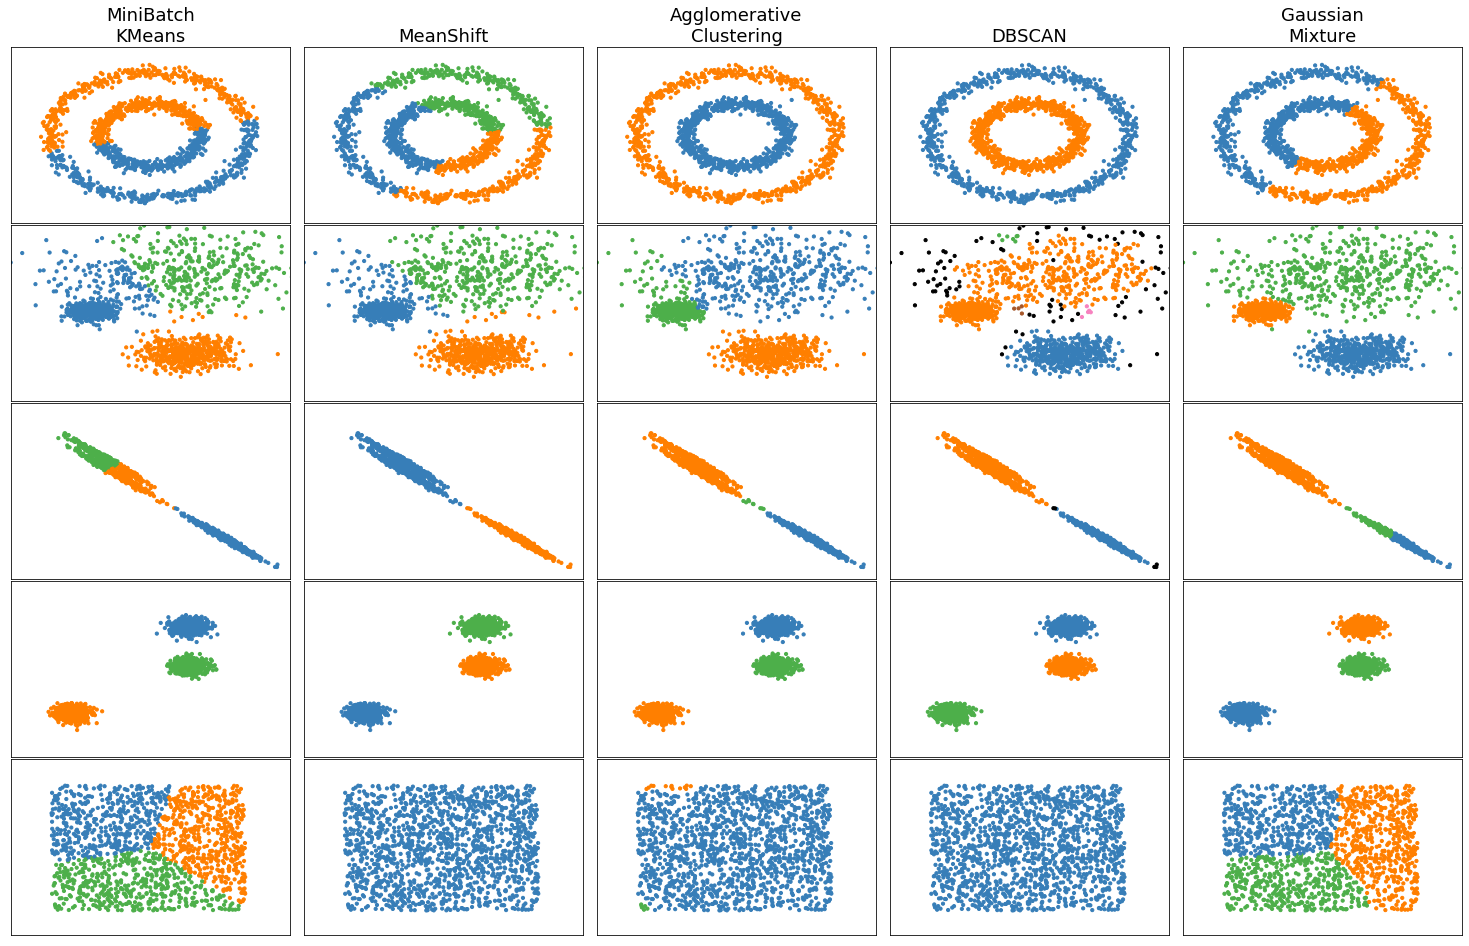

In [15]:
plot_comp()